# Borrowed Code from the github repo 'MYC21_ZTF_MU' But Exclude the strecth and color corrections #

Here I will be borrowing code from the above-mentioned repository. 

Here is the excerpt from the paper that tells us the values of alpha and beta:


We present our ZTF Hubble diagram for the 2629 non-peculiar SNe~Ia that pass our quality cuts in Figure~6. These SNe~Ia have been standardized using the methodology detailed in Ginolin et~al.~(2024), given the SALT2 stretch and color parameters and host local environmental properties (for example, Sullivan et~al.~2010; Rigault et~al.~2020). Following that paper, we adopt the nuisance parameter values $\alpha = -0.16$, $\beta = 3.05$, and $\gamma = 0.145~\mathrm{mag}$ (local-color step).


The standardized distance modulus for each Type~Ia supernova is computed using the Tripp (1998) relation:

The observed distance modulus in the SALT2 framework is given by: 

$
\mu_{\mathrm{obs}} = -2.5 \log_{10}(x_0) + \alpha x_1 - \beta c + M_B,
$


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

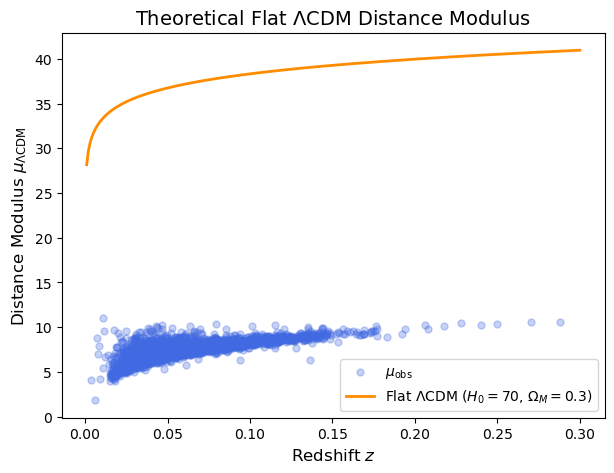

In [4]:
# Lets start by reading the data:

df = pd.read_csv("ZTF_DESI_DATA/ZTF_snia_data.csv")
df = df.reset_index(drop=True)

# Define parameters (using your specified signs and MB)
alpha = 0.16
beta = 3.05
MB = -19.5

# Compute the observed distance modulus without accounting for stretch or color corrections. 
df["mu_obs"] = -2.5 * np.log10(df["x0"])
# df["mu_obs"] = -2.5 * np.log10(df["x0"]) + alpha * df["x1"] - beta * df["c"] - MB


# Define a fiducial flat ΛCDM cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)  # H0 in km/s/Mpc, Ω_M = 0.3

# Generate a smooth redshift grid
z_grid = np.linspace(0.001, 0.3, 300)  # avoid z=0 (log issues)

# Compute the theoretical distance modulus for each z
mu_grid = cosmo.distmod(z_grid).value  # distance modulus in magnitudes

# Plot the flat ΛCDM Hubble curve
plt.figure(figsize=(7,5))
plt.scatter(df["redshift"], df["mu_obs"], s=25, alpha=0.3, color="royalblue", label=r"$\mu_{\mathrm{obs}}$")
plt.plot(z_grid, mu_grid, color="darkorange", lw=2, label=r"Flat $\Lambda$CDM ($H_0=70$, $\Omega_M=0.3$)")
plt.xlabel("Redshift $z$", fontsize=12)
plt.ylabel(r"Distance Modulus $\mu_{\Lambda \mathrm{CDM}}$", fontsize=12)
plt.title("Theoretical Flat $\Lambda$CDM Distance Modulus", fontsize=14)
plt.legend()
plt.show()


        ztfname  redshift    mu_obs  mu_theory   residual
0  ZTF17aadlxmv  0.062019  7.371524  37.221017 -29.849492
1  ZTF18aaadqua  0.078672  7.682845  37.762769 -30.079923
2  ZTF18aaanzph  0.063718  8.899731  37.282294 -28.382562
3  ZTF18aaapivw  0.026341  7.491229  35.305293 -27.814064
4  ZTF18aaaqexr  0.070258  8.037183  37.504444 -29.467261


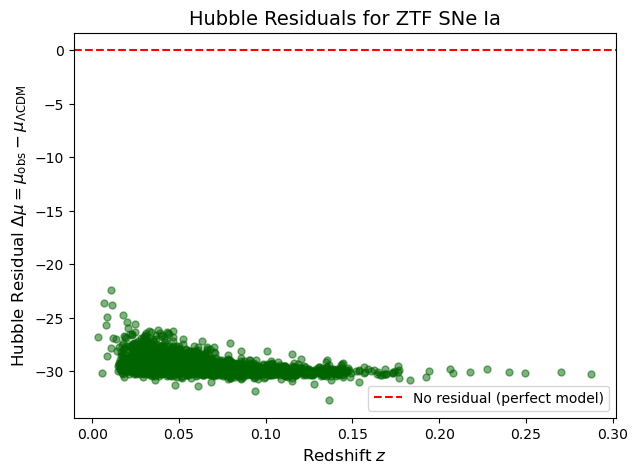

In [6]:
# Compute theoretical distance modulus for each SN using its redshift
df["mu_theory"] = cosmo.distmod(df["redshift"]).value

# Compute Hubble residuals (observed - theoretical)
df["residual"] = df["mu_obs"] - df["mu_theory"]

# Quick sanity check
print(df[["ztfname", "redshift", "mu_obs", "mu_theory", "residual"]].head())

# Plot residuals vs redshift
plt.figure(figsize=(7,5))
plt.scatter(df["redshift"], df["residual"], s=25, alpha=0.5, color="darkgreen")
plt.axhline(0, color="red", linestyle="--", label="No residual (perfect model)")
plt.xlabel("Redshift $z$", fontsize=12)
plt.ylabel(r"Hubble Residual $\Delta\mu = \mu_{\mathrm{obs}} - \mu_{\Lambda \mathrm{CDM}}$", fontsize=12)
plt.title("Hubble Residuals for ZTF SNe Ia", fontsize=14)
plt.legend()
plt.show()

New mean residual (after centering): 1.9353e-15


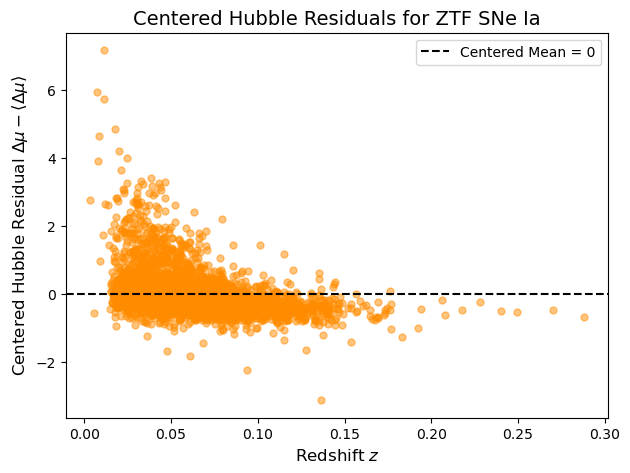

In [ ]:
mean_residual = df["residual"].mean()

# Subtract the mean residual (center the residuals)
df["residual_centered"] = df["residual"] - mean_residual

# Plot centered residuals
plt.figure(figsize=(7,5))
plt.scatter(df["redshift"], df["residual_centered"], s=25, alpha=0.5, color="darkorange")
plt.axhline(0, color="black", linestyle="--", label="Centered Mean = 0")
plt.xlabel("Redshift $z$", fontsize=12)
plt.ylabel(r"Centered Hubble Residual $\Delta\mu - \langle\Delta\mu\rangle$", fontsize=12)
plt.title("Centered Hubble Residuals for ZTF SNe Ia", fontsize=14)
plt.legend()
plt.show()

In [8]:
df.to_csv("ZTF_DESI_data/ZTF_residuals_centered_no_x1_no_c.csv", index=False)